Import necessary packages.

In [1]:
# import all functions from python labrary: sympy
from sympy import *
# import python library: matplotlib (for nice plots)
import matplotlib
# set sympy output to print pretty math expressions
init_printing()

Declare variables we are going to use as 'symbols'. We will add more along the way, if necessary.

In [2]:
### NOTE: it is important here to further declare these variables to be nonzero and positive (otherwise sympy cannot find solution for the FOCs)
q1, q2, c1, c2, a, b, pi1, pi2, q1hat, q2hat = symbols('q1 q2 c1 c2 a b \pi_1 \pi_2 \hat{q}_1 \hat{q}_2', nonzero=True, positive=True)

# 2-firm Cournot competition setup

## Firms and demand

Assume two firms, 1 and 2, competes according to Cournot competition. We assume each firm has constant marginal cost, $c_1$ and $c_2$.

The market demand for a product is linear, such that the inverse demand function takes the form of
\begin{align}
    p = a - b (q_1 + q_2)
\end{align}

We assume $a > c_1$ and $a > c_2$, so that consumer's willingness to pay exceeds the firm's cost to produce.

## The firm's profit-maximization problem

Under these modeling assumptions, each firm's profit is
\begin{align}
    \pi_1 &= p\cdot q_1 - c_1 \cdot q_1 \\
            &= (p-c_1)q_1 \\
    \pi_2 &= p\cdot q_2 - c_2 \cdot q_2 \\
            &= (p-c_2)q_2 \\
\end{align}
or, for $i=1,2$,
\begin{align}
    \pi_i &= p\cdot q_i - c_i \cdot q_i \\
            &= (p-c_i)q_i \\
\end{align}

Plugging in the inverse demand function, each firm's profit is
\begin{align}
    \pi_1 & = \big(a - b(q_1 + q_2) - c_1\big) q_1 \\
    \pi_2 & = \big(a - b(q_1 + q_2) - c_2\big) q_2
\end{align}
or, for $i=1,2$,
\begin{align}
    \pi_i & = \big(a - b(q_i + q_j) - c_i\big) q_i
\end{align}

# Analysis

## Solve for the Nash equilibrium of the game

### Solve the firm's best responses given beliefs about opponent's output level

Assume that firm 1 (2) believes firm 2 (1) would produce an output level of $\hat{q}_2$ ($\hat{q}_1$), then each firm would choose their own output levels to maximize:
\begin{align}
    \max_{q_1}\pi_1 & = \big(a - b(q_1 + \hat{q}_2) - c_1\big) q_1 \\
    \max_{q_2}\pi_2 & = \big(a - b(\hat{q}_1 + q_2) - c_2\big) q_2
\end{align}
or, for $i=1,2$,
\begin{align}
    \max_{q_i}\pi_i & = \big(a - b(q_i + \hat{q}_j) - c_i\big) q_i
\end{align}

Firm $i$'s FOC is
\begin{align}
    \frac{\partial pi_i}{\partial q_i} &= \big(a - b(q_i + \hat{q}_j) - c_i\big) -b q_i \\
    &= a - b\hat{q}_j - c_i - 2bq_i = 0 \\
    \Rightarrow \qquad q_i^* &= \frac{a - c_i - b\hat{q}_j}{2b}
\end{align}

In [3]:
# define inverse demand function
p = a - b*(q1 + q2)
# define profit functions for each firm
pi1 = (p-c1)*q1
pi2 = (p-c2)*q2
# check profit function
pi1

In [4]:
# each firm's profit under the beliefs are
pi1.subs([(q2, q2hat)])
pi2.subs([(q1, q1hat)])

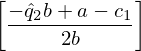

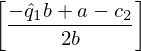

In [5]:
# solve for each firm's best response function
q1br_sol = solve(pi1.subs([(q2, q2hat)]).diff(q1), q1)
display(q1br_sol)
q2br_sol = solve(pi2.subs([(q1, q1hat)]).diff(q2), q2)
display(q2br_sol)

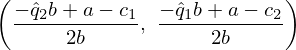

In [25]:
# retrieve the first element of these solutions
q1br = q1br_sol[0]
q2br = q2br_sol[0]
q1br, q2br

### Plot the best responses

In [26]:
# assume some values on exogenous variables for plots
a_value = 10
b_value = 1
c1_value = 2
c2_value = 4

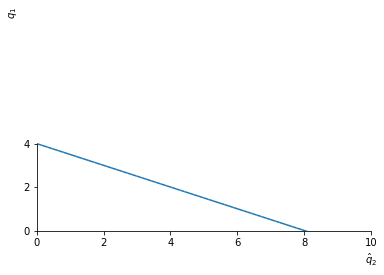

In [28]:
# plot the best response for firm 1
q1plot_fun = q1br.subs([(a,a_value),(b,b_value),(c1,c1_value),(c2,c2_value)])
q1plot = plot(q1plot_fun, (q2hat,0,10), ylim=[0,10], xlabel="$\hat{q}_2$", ylabel="$q_1$")

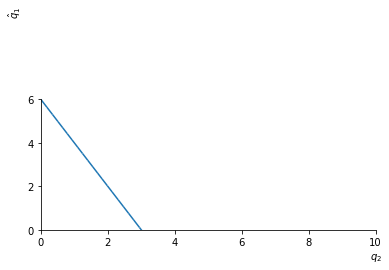

In [29]:
## plot the best response for firm 2 (inversed graph)
# inverse the function
q2plot_fun_inv = solve(q2br.subs([(a,a_value),(b,b_value),(c1,c1_value),(c2,c2_value)]) - q2, q1hat)[0]
display(q2plot_fun_inv)
# plot
q2plot = plot(q2plot_fun_inv, (q2,0,10), ylim=[0,10], xlabel="$q_2$", ylabel="$\hat{q}_1$")

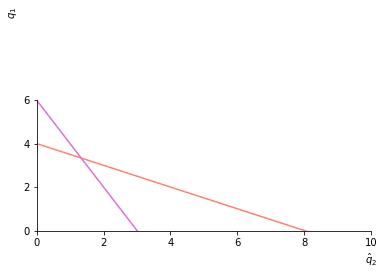

In [30]:
# overlay two graphs by imposing the NE condition that $q1hat = q1$ and $q2hat = q2$

# combine curves into one plot
Eqplot_combo = q1plot
Eqplot_combo.extend(q2plot)

# assign colors for each line
Eqplot_combo[0].line_color='salmon'
Eqplot_combo[1].line_color='orchid'

# show plot
Eqplot_combo.show()

### Solve for the Nash equilibrium output levels

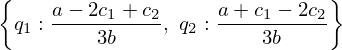

In [31]:
# solve for NE, imposing that $q1hat = q1$ and $q2hat = q2$
NE_sol = solve([q1br.subs([(q2hat, q2)]) - q1, q2br.subs([(q1hat, q1)]) - q2], q1,q2)
NE_sol

In [32]:
# retrieve equilibrium output levels of each firm
q1star = NE_sol[q1]
q2star = NE_sol[q2]

In [33]:
# check solved equilibrium against previous graphs
q1star.subs([(a,a_value),(b,b_value),(c1,c1_value),(c2,c2_value)])

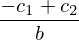

In [14]:
# compare output levesl of firm 1 vs. firm 2
simplify(q1star - q2star)

### Solve for equilibrium price

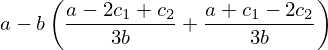

In [15]:
p.subs([(q1,q1star),(q2,q2star)])

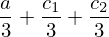

In [16]:
pstar = p.subs([(q1,q1star),(q2,q2star)]).simplify()
pstar

## Comparative statics

### on output levels

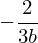

In [17]:
# When firm's own cost increases: its output level decreases in equilibrium
q1star.diff(c1)

In [18]:
# When a firm's competitor's cost increases: its output level increases in equilibrium
q1star.diff(c2)

In [19]:
# When consumer's willingness to pay increases: firm i's equilibrium output level increases
q1star.diff(a)

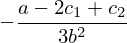

In [20]:
# When demand curve is steeper (demand less elastic): firm i's equilibrium output level ambiguous
#     Note: a low-cost firm would decrease output; a high-cost firm may increase output (can you figure out why?)
q1star.diff(b)

### on equilibrium price in the market

In [21]:
# When firm's own cost increases: market price increases in equilibrium
pstar.diff(c1)

In [22]:
# When firm's competitor's cost increases: market price increases in equilibrium
pstar.diff(c2)

In [23]:
# When consumer's willingness to pay increases: market price increases in equilibrium
pstar.diff(a)

In [24]:
# When demand curve is steeper (demand less elastic): market price does not change in equilibrium
#    Note: this is an artifact of the linear demand function; not generally true
pstar.diff(b)